# Students : Hazim Benslimane, Christopher Jabea, Dylan Rachwal, Alexandre Thouvenot 

## Project of Machine learning for classification on the 2 datasets Banknote Authentication and Chronic Kidney Disease

In [1]:
%matplotlib inline
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from graphviz import Source
from functions import *


mpl.style.use("ggplot")

Populating the interactive namespace from numpy and matplotlib


# Import Dataset Banknote

In [2]:
columns_name = ['variance', 'skewness','curtosis','entropy','class']
X,Y,class_labels = load_data("data_banknote_authentication.txt", False, columns_name)
X = min_max_normalization(X)

In [3]:
X, Y = shuffle(X.values, Y)

In [4]:
X_train, X_test, Y_train, Y_test = split_data(X, Y, 900)

## PCA

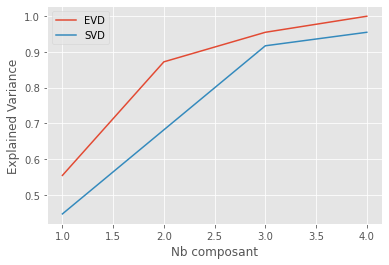

In [5]:
# PCA based on EVD decomposition
pca_evd = PCA_dec(X)

# PCA based on SVD decompostion 
pca_svd = PCA(n_components=4)
pca_svd.fit(X)

plt.plot(range(1,5), pca_evd.exp_variance(), label="EVD")
plt.plot(range(1,5), 1-pca_svd.explained_variance_ratio_, label="SVD")
plt.xlabel('Nb composant')
plt.ylabel('Explained Variance')
plt.legend()
plt.show()

In [6]:
X_pca_2 = pca_evd.PCA_decomposition(2)

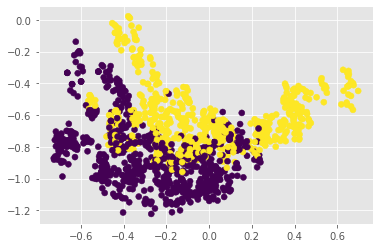

In [7]:
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=Y)
plt.show()

In [8]:
X_pca_3 = pca_evd.PCA_decomposition(3)

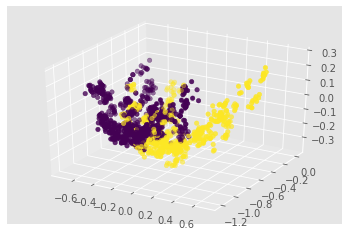

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], c=Y)
plt.show()

## KNN Analysis

In [10]:
K = 10
n_split = 5
train_index_list, test_index_list = K_Fold(X, n_split)

accuracy = np.zeros((1,2))
recall = np.zeros((1,2))
for index_train, index_test in zip(train_index_list, test_index_list):
    X_train = X[index_train,:]
    Y_train = Y[index_train]
    X_test = X[index_test,:]
    Y_test = Y[index_test]
    Y_pred = KNN(X_train, Y_train, X_test, K)
    res = precision_recall_multilabels(Y_test, Y_pred, class_labels)
    accuracy += res[0]
    recall += res[1]

print("Class 0 accuracy : ", accuracy[0,0]/n_split)
print("Class 1 accuracy : ", accuracy[0,1]/n_split)
print("Class 0 recall : ", recall[0,0]/n_split)
print("Class 1 recall : ", recall[0,1]/n_split)

Class 0 accuracy :  0.9972222222222221
Class 1 accuracy :  1.0
Class 0 recall :  1.0
Class 1 recall :  0.9969696969696968


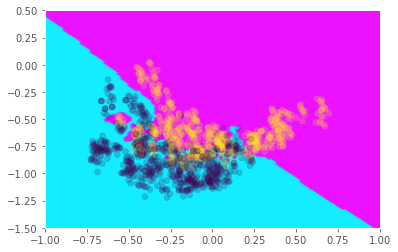

In [23]:
K = 10
X_pca_2 = pca_evd.PCA_decomposition(2)
x = np.linspace(-1, 1, 100)
y = np.linspace(-1.5, 0.5, 100)

mesh_x, mesh_y = np.meshgrid(x, y)
u = np.dstack((mesh_x.reshape(-1), mesh_y.reshape(-1)))[0]
Y_pred = KNN(X_pca_2, Y, u, K)
plt.contourf(x,y,Y_pred.reshape(100,100), cmap='cool')
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=Y, alpha=0.2)
plt.show()

In [13]:
Y_pred.size

10000

# Complete

## SVM

In [38]:
model_svm, Y_pred_SVM = predict_SVC(X_train, X_test, Y_train)

In [39]:
scoring = ['precision_macro', 'recall_macro', 'roc_auc', 'f1']
cv = 50

scores = multiple_prediction_scores(model_svm, X, Y, cv = cv,  scoring=scoring)

In [40]:
for key in enumerate (scores.keys()):
    print((f"For the metric {key[1]}, the mean is {round(scores[key[1]].mean(),3)} and the standard deviation is {round(scores[key[1]].std(),3)}.\n"))

For the metric fit_time, the mean is 0.010756287574768066 and the standard deviation is 0.0007550443723414707.

For the metric score_time, the mean is 0.004392566680908203 and the standard deviation is 0.000593962372447441.

For the metric test_precision_macro, the mean is 0.9806025641025642 and the standard deviation is 0.02737990301442681.

For the metric test_recall_macro, the mean is 0.9822083333333335 and the standard deviation is 0.0267291260716761.

For the metric test_roc_auc, the mean is 0.9993504273504275 and the standard deviation is 0.002802636955807138.

For the metric test_f1, the mean is 0.9793865689865691 and the standard deviation is 0.02983826866785704.



SVCModel Train Score is :  0.9788888888888889
SVCModel Test Score is :  0.9766949152542372


C:\Users\dylan\miniconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


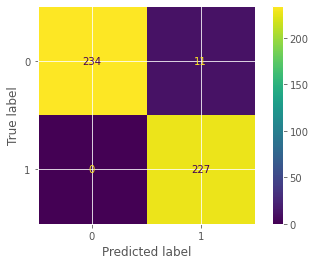

In [41]:
print('SVCModel Train Score is : ' , model_svm.score(X_train, Y_train))
print('SVCModel Test Score is : ' , model_svm.score(X_test, Y_test))
display_confusion_matrix(model_svm,X_test,Y_test, Y_pred_SVM);

In [ ]:
tab_log_tree = find_best_depths(X,Y,cvp=True)

Text(0, 0.5, 'Negative Log Loss')

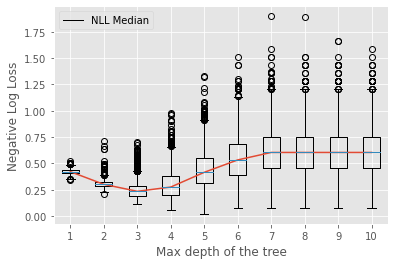

In [23]:
plt.boxplot(tab_log_tree)
plt.plot(linspace(1, 10, 10),[np.median(x) for x in tab_log_tree])
plt.legend(['NLL Median'])
xlabel('Max depth of the tree')
ylabel('Negative Log Loss')

In [22]:
class_forest = RandomForestClassifier(max_depth=3, n_estimators=1000)
class_forest.fit(X, Y)
pred_forest = class_forest.predict(X)



ValueError: could not convert string to float: 'normal'

## Import Dataset Kidney disease

In [42]:
X,Y,class_labels = load_data("kidney_disease.csv", True)

In [43]:
X_train, X_test, Y_train, Y_test = split_data(X, Y, 200)

## SVM

In [44]:
model_svm, Y_pred_SVM = predict_SVC(X_train, X_test, Y_train)

In [45]:
scoring = ['precision_macro', 'recall_macro', 'roc_auc', 'f1']
cv = 50

scores = multiple_prediction_scores(model_svm, X, Y, cv = cv,  scoring=scoring)

In [46]:
for key in enumerate (scores.keys()):
    print((f"For the metric {key[1]}, the mean is {round(scores[key[1]].mean(),3)} and the standard deviation is {round(scores[key[1]].std(),3)}.\n"))

For the metric fit_time, the mean is 0.015166459083557128 and the standard deviation is 0.002410962390380908.

For the metric score_time, the mean is 0.004563884735107422 and the standard deviation is 0.0006314239684767011.

For the metric test_precision_macro, the mean is 1.0 and the standard deviation is 0.0.

For the metric test_recall_macro, the mean is 1.0 and the standard deviation is 0.0.

For the metric test_roc_auc, the mean is 1.0 and the standard deviation is 0.0.

For the metric test_f1, the mean is 1.0 and the standard deviation is 0.0.



SVCModel Train Score is :  1.0
SVCModel Test Score is :  1.0


C:\Users\dylan\miniconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


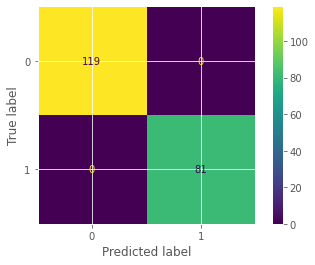

In [47]:
print('SVCModel Train Score is : ' , model_svm.score(X_train, Y_train))
print('SVCModel Test Score is : ' , model_svm.score(X_test, Y_test))
display_confusion_matrix(model_svm,X_test,Y_test, Y_pred_SVM);

# KNN clustering